# Making a Single Divergent Point Velocity Field Map.

This notebook is Tutorial 3 of the [```CosmosCanvas```](https://github.com/mlarichardson/CosmosCanvas) package. This Python 3 tutorial highlights the creation of a perception-based colour map designed for plotting velocity fields. It is designed to be displayed on a black background. These velocity field maps are inspired by compensating tones suggested by J. English; compensating tones are produced when complementary colours are blended and should mix to neutral grey when balanced. This neutral grey is used to represent the systemic velocity in most cases, but can be assigned to the velocity of any salient feature. 

The set of default colour maps are defined in `velmap.py` 
    A. Single Divergence Point 
    B. Double Complement Plus Divergent Point 
    C. Double Complement Plus Chroma and Luminosity Adjustments. 
A colour map is created using the central velocity ('div') and velocity limits. The selected colour scheme is plotted so that the user can ensure that div is in the correct position within the range.  Then the LCH curves are plotted to demonstrate that the Luminosity is monotonic (or contains a notch in luminosity at the desired data value), the Chroma is within the gamut of the LCH colour space, and the Hue is well-behaved.  
Subsequently the galaxy fits file is loaded and the colour map is applied. This is shown for the three default maps listed above. Additionally how to customize a map is outlined. 
This notebook uses published ATNF ATCA data for its example. 

*Package*
This package includes `specindex.py`, `velmap.py`, and `galfits.py` for plotting; the latter requires the installation of `Astropy`.
Additionally it uses the [```colourspace```](https://github.com/gillesferrand/colourspace) package by Gilles Ferrand for making custom colour maps in LCH colour space.

Authors: Mark L. A. Richardson, Gilles Ferrand, Nathan Deg and Jayanne English, 25 July 2022.

This notebook was adjusted by Jayanne English 2024-03-20.

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
# If you work in a project directory, the code can be called from the CosmosCanvas local repository directory
# using this format: from CosmosCanvas import velmap as vmap
import velmap as vmap
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
# Make a folder for saving figures.
import os
plt_dir = 'plots'
if not os.path.exists(plt_dir): os.makedirs(plt_dir)

In [4]:
# Create the Single Divergence Point Default Colour Map. 
    # This map is straight forwardly monotonically decreasing in value from blueshift to redshift.
    # Only 2 colours complementary colours are employed to create compensating tones to either side of the grey divergent point.
    # Light cyan represents blueshift while dark orange-red represents redshift.   
    # The defaults for LCH values for this colour map exist in velmap.py. 
    
    # Colour saturation can be adjusted using the c_max parameter.  

# Set min/max values. 
# For div ==  systemic velocity, the min_ and max_values need to be equidistant in value from div.  
# Also div may require a decimal value (e.g. 2719.5) to place it in the centre of the scheme. 
# The velocity values should be entered here in the units of the momment 1 map, which could be in km/s or m/s.
min_value = 2676.0
max_value = 2760.0
div=2719.0

# Chroma max: 
c_max = 35.

# Create the Single Divergent Point Default velocity cmap.
# This uses default LCH values in the function "create_cmap_velocity" in velmap.py
cmapA = "CC-vmap-single-default"
vmap.create_cmap_velocity(min_value,max_value,name=cmapA, Cval_max=c_max,div=div)
# By default the colourmap is registered to the mpl namespace

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'CC-vmap-single-default' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-single-default' to Matplotlib


writing  ./plots/testcmap_CC-velmap-single_CC-vmap-single-default.png


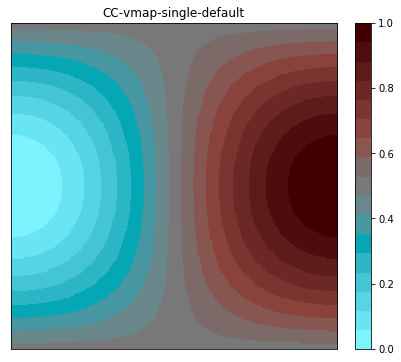

In [5]:
# Plot the scheme for quality control and store the plot.
    # Tip: If grey is not in the middle then adjust the min/max values to be symmetric around the div parameter. 
    #      Also add a decimal value to div to put it in the centre of the bin. 

maps.test_cmaps(names=[cmapA],nsteps=[17],subplots=(1,1),figsize=(15,6),fname=plt_dir+"/testcmap_CC-velmap-single")

loading gamut from /Users/english/pythonPackages/colourspace/gamut/Cmax_res10_sRGB.npy


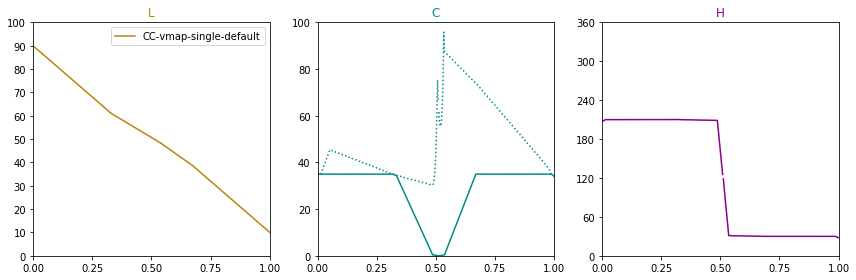

In [6]:
# Let's show the default colour map in LCH space.
# Again values are rescaled to 0:1 using the plot_path function.
    # The data values are on the x-axis. L==luminosity, C==chroma, H==hue are on the y-axis. 
    # L decreases to redshift values. C of 0 gives grey at the middle velocity value. 
    # Red hues are around 360/0 degrees on the colour wheel and the complementary colour differs by 180 degrees.
    # The dotted line traces the monitor's gamut.  See Gilles Ferrand's colourspace (https://github.com/gillesferrand/colourspace)

axes = maps.plot_path(cmapA, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapA)

Let's apply this colour scheme to a FITS moment 1 velocity map. 

In [7]:
# First import our fits loading script and matlib requirements. 
from CosmosCanvas import galfits as gal
import importlib
importlib.reload(gal)

<module 'CosmosCanvas.galfits' from '/Users/english/pythonPackages/CosmosCanvas/galfits.py'>

In [8]:
# Set galaxy information
    # Take care that negative declinations have a minus sign all components of the coordinates. 
    # The field of view is adjusted by the radius parameter
# Published test data. 
title='NGC 3256c ATNF 1994'
fits_file="example_data/mom1linmosN3256c.na.clip3sig.pk6.2sig.fits"
RA = [10., 29., 03.85]    # hh.,mm.,ss.s
DEC = [-43., -50., -48.7] # deg.,arcmm.,arcss.s; southern declinations are -deg.,-arcmm.,-arcss.s

#The image can be trimmed to a rectangle or left as is.  To leave it as is, set
    #TrimSwitch='no_trim'
    #ImgSize=[]  #  We always need an image size to be passed to the code
#For Rectangle images set
TrimSwitch='rectangle'
ImgWidth=0.08 #degrees
ImgHeight=0.1 #degrees
ImgSize = [ImgWidth, ImgHeight]# degrees
#  For square images simply set ImgWidth=ImgHeight

shift = [0.0, 0.0] # degrees

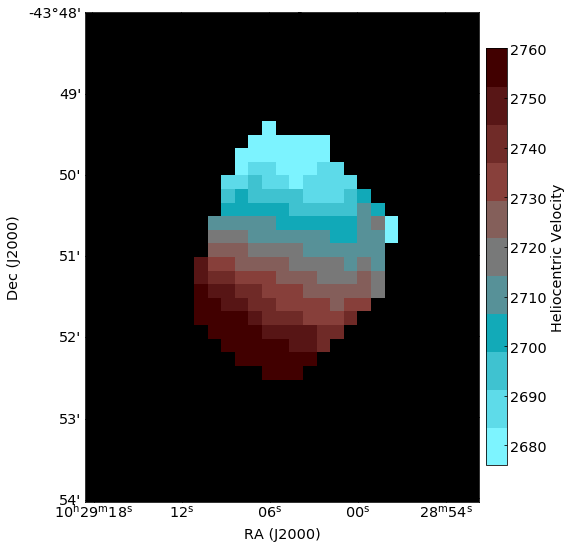

In [9]:
# Plot galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

# For examples of tick marks please review tutorial 2. 
# Odd number of bins (nsteps) are required to display colour (grey) of minor velocity axis. 
# To skip over this colour use an even number.
nsteps= 11  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmapA,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=True,TrimSwitch=TrimSwitch,figsize=(8,9))

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig(plt_dir+'/plotSingleDivPt_N3256c.png', bbox_inches = "tight", dpi=300)

For the Double Complement Plus Divergent Default colour map, we use a two pairs of complementary colours. This scheme, which is the second of our default colour maps, has slightly more variation in colour and luminiosity; it is designed for more complex systems. The div point is still grey. The blueshift limit is now turquoise, a warmer blue that perceptually approaches. Also in this map the grey div point luminosity is lightened in order to emphasize the minor axis.

In [10]:
# Double Complement Plus Divergent Default colour map.
# Change both the number of colours and the luminosities.  
    # Using double complements, (1) cyan to red-orange and (2) turquoise to rose. The computer monitor gamut
    # for cyan has limited variations so turquoise is added. 
    # Max Blueshift = Turquoise then as the velocity increases the hue transitions through cyan to grey 
    # then to dull red-orange and dark rose, which is the compliement of the turquoise.      
    # Luminosity change is used to make the systemic velocity lighter so the minor axis is obvious.  

# Set the saturation using Chroma max: 
c_max =50.

cmapB = "CC-vmap-DoubleLum-default"

# This uses default LCH values in the function "create_cmap_doubleVelocity" in velmap.py
cmapB=vmap.create_cmap_doubleVelocity(min_value,max_value,div=div,Cval_max=c_max,name=cmapB)
# By default the colourmap is registered to the mpl namespace
print(cmapB)


creating cmap 'CC-vmap-DoubleLum-default' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-DoubleLum-default' to Matplotlib
CC-vmap-DoubleLum-default


writing  ./plots/testcmap_CC-velmapDoubleLumDefault.png_CC-vmap-DoubleLum-default.png


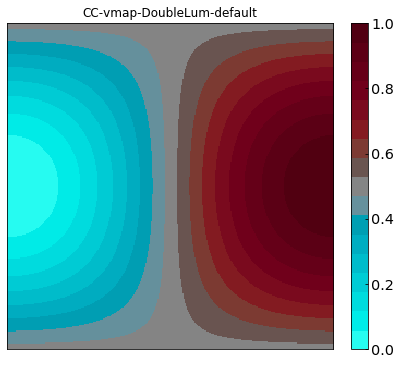

In [11]:
# Check the multiple divergent point colour map. 
maps.test_cmaps(names=[cmapB],nsteps=[17],subplots=(1,1),figsize=(15,6),fname=plt_dir+"/testcmap_CC-velmapDoubleLumDefault.png")

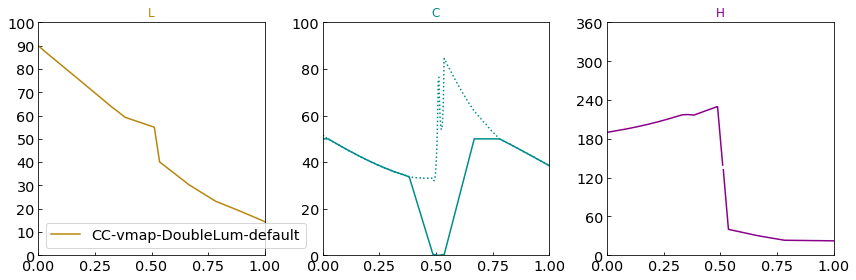

In [12]:
# Let's show the Double Complement Plus Divergent Default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
# Notice the luminosity increase at the grey div value. 
axes = maps.plot_path(cmapB, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapB)

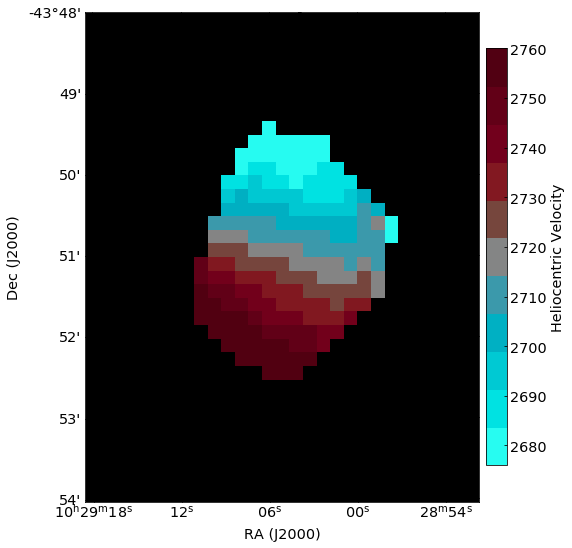

In [13]:
# Plot Double Complement Plus Luminosiy version of the galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

#ticks = [min_value,-0.8,-0.45,-0.1,max_value]
nsteps= 11  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmapB,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=True,TrimSwitch=TrimSwitch,figsize=(8,9))

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig(plt_dir+'/plotDoubleLum_N3256c.png', bbox_inches = "tight", dpi=300)

In [14]:
# Customize the colour map.  
# This example of the Double Complement Plus Luminosity Map demonstrates how a user can adjust colours and luminosities. 
# Set the colours and their luminosities.  
# Width of the grey segment can also be changed.

# Set the saturation using Chroma max: 
c_max =50.

# Select Hues, using degrees on the colour wheel: 
Hval_L=190. # Left for lowest data value.  Turquoise.
Hval_R=10.  # Right for highest data value. Rose.
Hval_1=210. # cyans
Hval_2=230.
Hval_3=40.  # While hue 50 is the complement to 230 it looks too brown so the colour selected is offset.
Hval_4=30.

# Adjust luminosity: 
Lval_1=61. # This is the default value in velmap.py file.
Lval_2=55.  
Lval_mid=70.
Lval_3=55 
Lval_4=35

# Adjust range for minor axis segment. (Default=0.05; Recommended max = 0.15)
width=0.05  # This is the segment centred on div that will be grey (chroma = 0)

cmapB = "CC-vmap-DoubleLum-Customize"

vmap.create_cmap_velocity(min_value,max_value,name=cmapB, width=width, Cval_max=c_max,div=div,
                          Hval_L=Hval_L,Hval_R=Hval_R,Hval_1=Hval_1,Hval_2=Hval_2,Hval_3=Hval_3,Hval_4=Hval_4, 
                          Lval_mid=Lval_mid,Lval_1=Lval_1,Lval_2=Lval_2,Lval_3=Lval_3, Lval_4=Lval_4)
# By default the colourmap is registered to the mpl namespace



creating cmap 'CC-vmap-DoubleLum-Customize' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-DoubleLum-Customize' to Matplotlib


writing  ./plots/testcmap_CC-velmapCustomize2.png_CC-vmap-DoubleLum-Customize.png


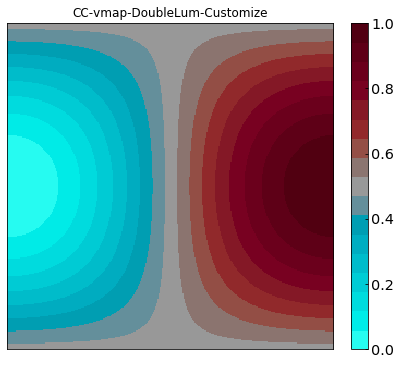

In [15]:
# Check the multiple divergent point colour map. 
maps.test_cmaps(names=[cmapB],nsteps=[17],subplots=(1,1),figsize=(15,6),fname=plt_dir+"/testcmap_CC-velmapCustomize2.png")

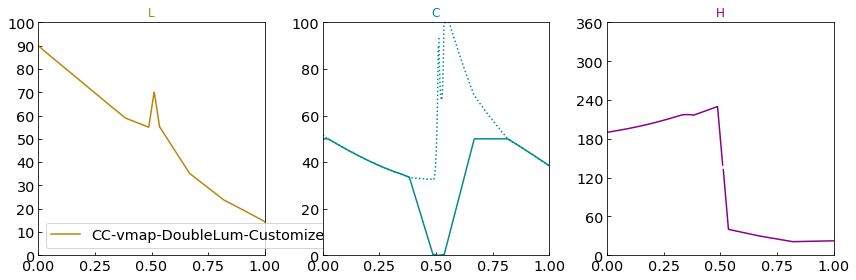

In [16]:
# Let's show the Double Complement Plus Divergent Default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
# Notice the luminosity increase at the grey div value. 
axes = maps.plot_path(cmapB, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapB)

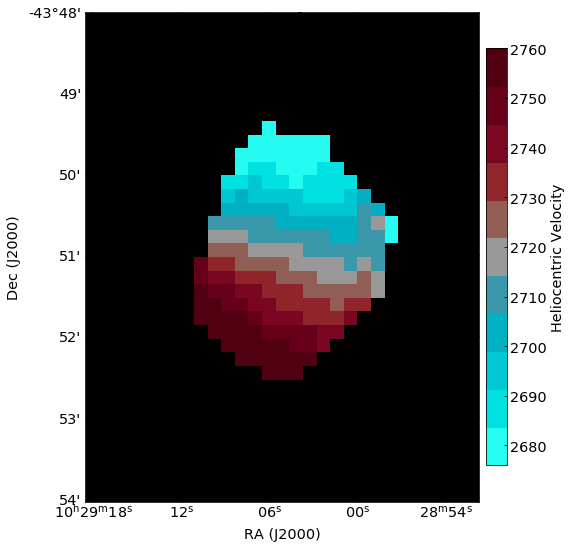

In [17]:
# Plot Double Complement Plus Luminosiy version of the galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

nsteps= 11 # Odd number required for grey of minor velocity axis to be displayed.  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmapB,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=True,TrimSwitch=TrimSwitch,figsize=(8,9))

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig(plt_dir+'/plotCustomize_N3256c_nsteps'+str(nsteps)+str(cmapB)+'Lval_mid'+str(Lval_mid)+'Chroma'+str(c_max)+'width'+str(width)+'.png', bbox_inches = "tight",dpi=300)

In the following example, the chroma and luminosity of the Double Complement Plus Luminosity colour map have been adjusted for vividness on a white background. The blueshifted data still appear to approach the viewer and the div point is still a light grey. 

In [18]:
# Customize the colour map for a white background.  
# This example of the Double Complement Plus Luminosity Map demonstrates how a user can adjust colours and luminosities. 
# Set the colours and their luminosities.  
# Width of the grey segment can also be changed.

# Set the saturation using Chroma values: 
Cval_max =50.
Cval_mid = 0.
Cval_4 = 40.
Cval_min = 35.

# Select Hues, using degrees on the colour wheel: 
Hval_L=190. # Left for lowest data value.  Turquoise.
Hval_R=10.  # Right for highest data value. Rose.
Hval_1=210. # cyans
Hval_2=230.
Hval_3=40.  # While hue 50 is the complement to 230 it looks too brown so the colour selected is offset.
Hval_4=30.

# Adjust luminosity: 
Lval_1=61. # This is the default value in velmap.py file.
Lval_2=55.  
Lval_mid=70.
Lval_3=55 
Lval_4=35
Lval_min=25.

# Adjust range for minor axis segment. (Default=0.05; Recommended max = 0.15)
width=0.05  # This is the segment centred on div that will be grey (chroma = 0)

cmapC = "CC-vmap-DoubleCompLumChroma-Customize"

vmap.create_cmap_chromaVelocity(min_value,max_value,name=cmapC, width=width, Cval_max=Cval_max, Cval_mid=Cval_mid,Cval_min=Cval_min, div=div,
                          Hval_L=Hval_L,Hval_R=Hval_R,Hval_1=Hval_1,Hval_2=Hval_2,Hval_3=Hval_3,Hval_4=Hval_4, 
                          Lval_mid=Lval_mid,Lval_1=Lval_1,Lval_2=Lval_2,Lval_3=Lval_3, Lval_4=Lval_4,Lval_min=Lval_min,Cval_4=Cval_4 )
# By default the colourmap is registered to the mpl namespace

creating cmap 'CC-vmap-DoubleCompLumChroma-Customize' for Matplotlib (1020 steps)
registering cmap 'CC-vmap-DoubleCompLumChroma-Customize' to Matplotlib


writing  ./plots/cmap_CC-velmapCustomize-DblLumChro.png_CC-vmap-DoubleCompLumChroma-Customize.png


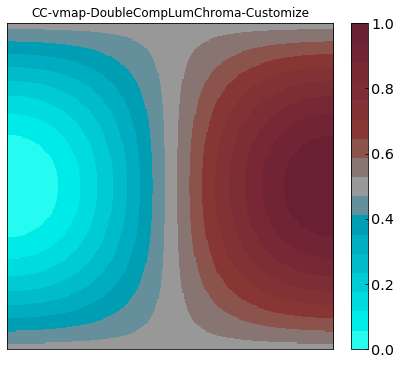

In [19]:
# Check the multiple divergent point colour map. 
maps.test_cmaps(names=[cmapC],nsteps=[17],subplots=(1,1),figsize=(15,6),fname=plt_dir+"/cmap_CC-velmapCustomize-DblLumChro.png")

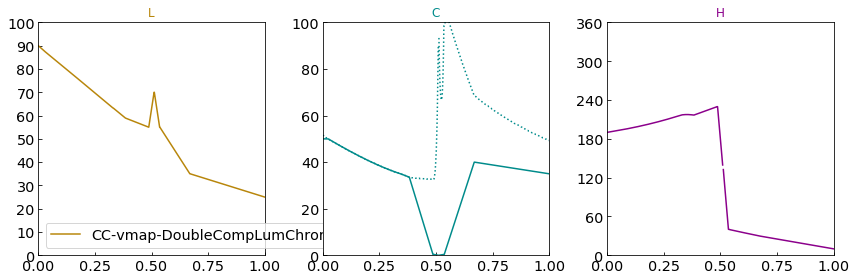

In [20]:
# Let's show the Double Complement Plus Divergent Default colour map in LCH space, again rescaled to 0:1 using the plot_path function.
# Notice the luminosity increase at the grey div value. 
axes = maps.plot_path(cmapC, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label=cmapC)

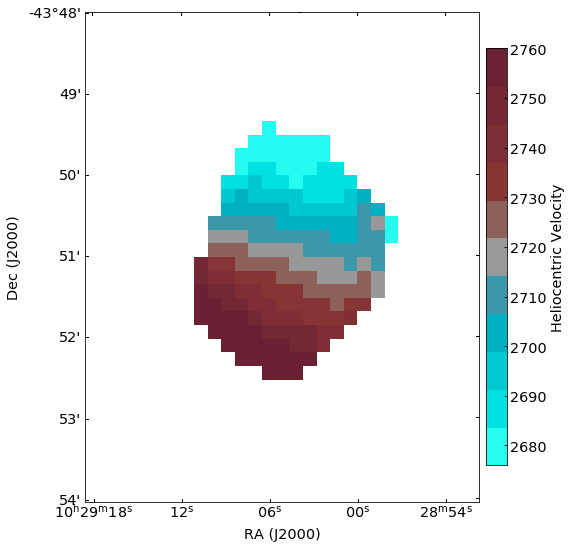

In [21]:
# Plot Double Complement Plus Luminosiy version of the galaxy both in this notebook and to a png file.  
# This version's data is binned. To make the plot appear continuous increase nstep to 1000 or more.

nsteps= 11 # Odd number required for grey of minor velocity axis to be displayed.  
cbar_name = "Heliocentric Velocity"

# One can set the background to be black. In this case the beam is not plotted. 
fig, ax = gal.plot_galaxy(fits_file,RA,DEC,ImgSize,shift,cmapC,min_value,max_value,nsteps=nsteps,cb_name=cbar_name,show_beam=False,bkgrd_black=False,TrimSwitch=TrimSwitch,figsize=(8,9))

# Note directory for the velocity field pngs. Change the name of your plot to avoid overwriting the results.
fig.savefig(plt_dir+'/1-white-Customize_N3256c_nsteps'+str(nsteps)+str(cmapC)+'Lval_mid'+str(Lval_mid)+'ChromaMax'+str(Cval_max)+'ChromaMid'+str(Cval_mid)+'ChromaMin'+str(Cval_min)+'width'+str(width)+'.png', bbox_inches = "tight",dpi=300)